Aldo Oktavianus
2702234081

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Gauss Seidel

In [23]:
# data

x = [
    [
        [8, -2, 3],
        [-1, 10, -2],
        [2, 1, 9]
    ],
    [
        [6, 1, -1],
        [1, 7, 2],
        [-1, 2, 8]
    ],
    [
        [7, -2, 1],
        [1, 8, -2],
        [2, 1, 9]
    ],
    [
        [10, 1, 1],
        [1, 11, -1],
        [1, -1, 12]
    ],
    [
        [2, -4, 1],
        [3, 2, -5],
        [-4, 6, 2]
    ],
    [
        [-3, 1, -4],
        [1, -2, 5],
        [2, 3, -1]
    ],
    [
        [1, 2, -3],
        [1, 8, -2],
        [7, -8, 9]
    ],
    [
        [3, -1, 4],
        [1, 2, -5],
        [2, -3, 1]
    ]
]


y = [
    [10,15,25],
    [8,14,20],
    [9,10,11],
    [12,14,16],
    [-3,7,1],
    [-6,7,8],
    [5, -8,10],
    [5, 3 ,7]
]


In [29]:
def isDiagonal(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))
    
    off_diag = np.sum(np.abs(x), axis = 1) - diag
    
    if np.all(diag>off_diag):
        return True
    else:
        return False

In [47]:
def gauss(x, y, e = 0.081, t = 25):
    if not isDiagonal(x):
        print("Not diagonally dominant, Thus not convergent")
        return
    
    x = np.array(x)
    y = np.array(y)
    
    diag = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)
    
    old_mat = np.zeros(x[0].shape)
    
    for i in range(t):
        new_mat = np.array(old_mat)
        
        for idx, row in enumerate(x):
            new_mat[idx] = (y[idx] +  np.dot(new_mat, row))/diag[idx]
            
        print(f"Iterations {i} = {new_mat}")
        
        euc = np.square(np.dot(new_mat - old_mat, new_mat- old_mat))
        #print(f"euc = {euc}")
        if euc<e:
            print("Convergent!!")
            return
        old_mat = new_mat
        
for i, (a,b) in enumerate(zip(x, y)):
    print(f"Matrix {i+1}")
    #print(f"A = {x[i]}, y = {y[i]}")
    gauss(a, b)
    print("="*50,"\n")

Matrix 1
Iterations 0 = [1.25       1.625      2.31944444]
Iterations 1 = [0.78645833 2.04253472 2.37606096]
Iterations 2 = [0.86961082 2.06217327 2.35540056]
Convergent!!

Matrix 2
Iterations 0 = [1.33333333 1.80952381 2.21428571]
Iterations 1 = [1.40079365 1.16723356 2.38329082]
Iterations 2 = [1.53600954 1.09962983 2.41709373]
Convergent!!

Matrix 3
Iterations 0 = [1.28571429 1.08928571 0.81547619]
Iterations 1 = [1.48044218 1.26881378 0.75225576]
Convergent!!

Matrix 4
Iterations 0 = [1.2        1.16363636 1.33030303]
Iterations 1 = [0.95060606 1.30724518 1.36305326]
Convergent!!

Matrix 5
Not diagonally dominant, Thus not convergent

Matrix 6
Not diagonally dominant, Thus not convergent

Matrix 7
Not diagonally dominant, Thus not convergent

Matrix 8
Not diagonally dominant, Thus not convergent



# 2. Regression and Plotting

In [56]:
x = np.array([0.0, 0.01265823, 0.02531646, 0.03797468, 0.05063291, 0.06329114,
0.07594937, 0.08860759, 0.10126582, 0.11392405, 0.12658228, 0.13924051,
0.15189873, 0.16455696, 0.17721519, 0.18987342, 0.20253165, 0.21518987,
0.2278481, 0.24050633, 0.25316456, 0.26582278, 0.27848101, 0.29113924,
0.30379747, 0.3164557, 0.32911392, 0.34177215, 0.35443038, 0.36708861,
0.37974684, 0.39240506, 0.40506329, 0.41772152, 0.43037975, 0.44303797,
0.4556962, 0.46835443, 0.48101266, 0.49367089, 0.50632911, 0.51898734,
0.53164557, 0.5443038, 0.55696203, 0.56962025, 0.58227848, 0.59493671,
0.60759494, 0.62025316, 0.63291139, 0.64556962, 0.65822785, 0.67088608,
0.6835443, 0.69620253, 0.70886076, 0.72151899, 0.73417722, 0.74683544,
0.75949367, 0.7721519, 0.78481013, 0.79746835, 0.81012658, 0.82278481,
0.83544304, 0.84810127, 0.86075949, 0.87341772, 0.88607595, 0.89873418,
0.91139241, 0.92405063, 0.93670886, 0.94936709, 0.96202532, 0.97468354,
0.98734177, 1.0])

y = np.array([2.09271945, 2.20028729, 2.25065766, 2.19974036, 2.18315491, 2.23194821,
2.16162725, 2.32693546, 2.27891101, 2.11751791, 2.1817317, 2.35680097,
2.20811778, 2.25274117, 2.4370985, 2.27372116, 2.37711196, 2.3783529,
2.43531517, 2.53773363, 2.36819891, 2.53666574, 2.36994729, 2.32868594,
2.57598781, 2.48459811, 2.4316247, 2.43237323, 2.39305619, 2.54415464,
2.44582352, 2.40166229, 2.67429708, 2.50764819, 2.61786442, 2.73820088,
2.62334732, 2.49238012, 2.64213359, 2.75184226, 2.5395776, 2.78986665,
2.64306456, 2.7631048, 2.85332376, 2.58884493, 2.59020845, 2.76524818,
2.81706237, 2.69608111, 2.802584, 2.82130965, 2.69087715, 2.86650847,
2.70441594, 2.80210609, 2.84531659, 2.72979077, 2.89120147, 2.87813038,
2.8630733, 2.91861252, 3.07955386, 2.83050749, 3.00522466, 2.96149855,
2.97810712, 3.13775419, 2.86423362, 3.05292434, 3.1226691, 3.14746303,
3.15208506, 3.16016772, 3.14045025, 3.00421247, 3.0136957, 3.116399,
3.21368012, 3.05797481])

m = 1.0019502200849573
c = 2.145795221332522


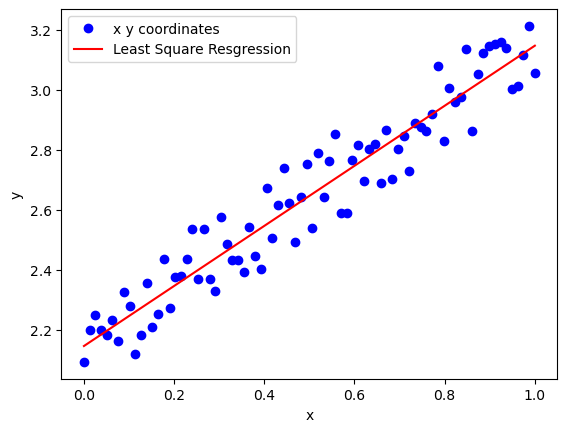

In [61]:
A = np.vstack([x, np.ones(x.shape[0])]).T
beta = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), y)
#print(beta)
m = beta[0]
c = beta[1]
print(f"m = {m}")
print(f"c = {c}")

plt.plot(x,y, "bo", label = "x y coordinates")
plt.plot(x, m*x+c, "r", label = "Least Square Resgression")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# 3. Newton Rhapson

In [73]:
def f(x):
    return 3*x**4 + 2*x**3 - 6*x**2 + 2
    
def d(x):
    return 12*x**3 + 6*x**2 - 12*x

def newton(x = 5, e = 0.081, t = 30):
    for i in range(t):
        x2 = x-(f(x)/d(x))
        print(f"Iteration {i+1}: new root = {x2}")
        if(f(x2)<e):
            print(f"The root of the equation is = {x2}")
            return
        x = x2
newton()

Iteration 1: new root = 3.7566037735849056
Iteration 2: new root = 2.837918072491105
Iteration 3: new root = 2.1656374969740533
Iteration 4: new root = 1.680596169391979
Iteration 5: new root = 1.3367387497569794
Iteration 6: new root = 1.0953567670378621
Iteration 7: new root = 0.9174256487584835
Iteration 8: new root = 0.7300792263283812
Iteration 9: new root = 1.2143415066243524
Iteration 10: new root = 1.0077190097872157
Iteration 11: new root = 0.8409471038429874
Iteration 12: new root = 0.4942695005212419
Iteration 13: new root = 0.8107850396696739
Iteration 14: new root = 0.12603041628613343
Iteration 15: new root = 1.4967426854528965
Iteration 16: new root = 1.2077871366605257
Iteration 17: new root = 1.0029304385525257
Iteration 18: new root = 0.836248251644105
Iteration 19: new root = 0.46216966273990084
Iteration 20: new root = 0.8039817829168439
Iteration 21: new root = -0.08408538109980601
Iteration 22: new root = -1.957603884901435
Iteration 23: new root = -1.772473476238

# 4. Integreal Riemann

In [81]:
def f(x): return 4*x**3 + 6*x**2 - 4*x + 5

start = -3
end = 8
interval = 2400
h = (start-end)/(interval-1)
x = np.linspace(start, end, interval)
#print(len(x)) 

mid = h*np.sum(f((x[:-1] + x[1:])/2))
trape = h/2 * (f(x[0]) + f(x[-1]) + 2*np.sum(f(x[1:-1])))

print(f"mid = {mid}")
print(f"trapezoid = {trape}")

# right = h*np.sum(f(x[1:]))
# left = h*np.sum(f(x[:-1]))
# print(right)
# print(left)

mid = -5037.999306192782
trapezoid = -5038.001387614438
